## 🧠 2.4 - Bootstrapping

---

### 📘 PART A: Conceptual Questions

**Q1.** What is bootstrapping, and how does it differ from traditional analytical methods for estimating sampling variability?

**Q2.** Why is bootstrapping especially useful for statistics like the median or model accuracy?

**Q3.** What does it mean when we say “bootstrap samples are drawn with replacement”? Why is this important?

**Q4.** Explain how bootstrapping can be used to estimate the confidence interval for a statistic. What are the steps involved?

---

#### Answers:

1. Bootstrapping is a method of estimating the sampling distribution of a statistic by drawing additional samples, with replacement, from the sample itself and re-calculate the statistic for each sample. It’s used to estimate standard errors, confidence intervals, and variability.
2. It helps to estimate variability in model parameters. *"If I had gotten a slightly different training set, how much would the coefficients change?"* These are stats with no reliable analytic sampling distribution, so bootstrapping fills the gap.
3. When we say “bootstrap samples are drawn with replacement” it means we put back each data point we sample from a population so that it may be possible to be selected again in the next sampling round. This is important because it allows us to continously sample an infinite amount of times and create a huge sample.
4. The steps involved are:
   * Predict something 1,000 times with 1,000 bootstrapped models.
   * Get a distribution of predictions.
   * We sort the results
   * Use that to create a confidence interval around the prediction (e.g., “we’re 95% confident the true prediction is between A and B”).



### 🧠 PART B: Application and Thinking

**Q5.** Suppose you have a sample of 500 customer reviews, and you want to estimate the standard error of the average star rating. How would you use bootstrapping to do this? Describe the process clearly.

**Q6.** You use bootstrapping to estimate the median income of a population at different sample sizes. At what point should you consider your sample size “large enough”? How do you determine that using your bootstrap results?

---

5. Steps to estimate the standard error of the average star rating, for sample size of *n*:
   * Draw a sample customer review rating from the 500 customer reviews, record and replace it.
   * Repeat *n* times.
   * Record the average of the n resampled customer rating.
   * Repeat steps 1–3 *R* times.
   * Use the R results to calculate their standard deviation (this estimates sample mean standard error).

**Question 6:**

You bootstrap different sample sizes (e.g., 10, 30, 50, 100, 200, ...).

At each sample size, you compute:
* Your statistic (in this case, the median)
* The standard error

You then plot:
  * Sample size (x-axis)
  * Variability measure (e.g., standard error) on the y-axis

You look for the point where the variability drops fast (steep slope), then it flattens out (diminishing returns).

That "flattening point" is your practical sample size

### 💻 PART C: Coding Exercise

### Dataset (Generated):

Here’s your dataset: a NumPy array of **simulated customer incomes** (in dollars). The income distribution is **right-skewed**, like real-world income.


In [1]:
import numpy as np

# Simulated population of 100,000 customer incomes
np.random.seed(42)
population_income = np.random.exponential(scale=40000, size=100000)

### Coding Tasks

**Q7.** Using the dataset above:

* a) Estimate the **standard error of the median** for a sample size of 50 using **1,000 bootstrap samples**.
* b) Repeat for sample sizes of 100, 200, and 500.
* c) Plot a line chart of sample size vs. standard error.
* d) From the chart, suggest a sample size that appears “large enough.”

---



In [2]:
# create empty list to store medians
sample_50_medians = list()

# Create function to compute standard error of medians through bootstrap method
def calculate_bootstrap_median(data, sample_size, bootstrap_sample_size=1000):
    # create empty list to store medians
    median_storage = list()
    # create loop for bootstrap sampling:
    for i in range(bootstrap_sample_size):
        sample = np.random.choice(data, size=sample_size, replace=True) # carry out sampling with replacement
        sample_median = np.median(sample) # find the median of the samples
        median_storage.append(sample_median) # store the median in the array
    # Find the standard error:
    std_error = np.std(median_storage)
    # Print results:
    print(f"Done for sample size of {sample_size} using {bootstrap_sample_size} bootstrap samples! Standard error: {std_error}")
    return median_storage, std_error

# Use our function to find the standard error of bootstrapped samples:
sample_50_medians,  sample_50_std_error = calculate_bootstrap_median(data=population_income, sample_size=50)
sample_100_medians,  sample_100_std_error = calculate_bootstrap_median(data=population_income, sample_size=100)
sample_200_medians,  sample_200_std_error = calculate_bootstrap_median(data=population_income, sample_size=200)
sample_500_medians,  sample_500_std_error = calculate_bootstrap_median(data=population_income, sample_size=500)
sample_700_medians,  sample_700_std_error = calculate_bootstrap_median(data=population_income, sample_size=700)
sample_1000_medians,  sample_1000_std_error = calculate_bootstrap_median(data=population_income, sample_size=1000)
sample_2000_medians,  sample_2000_std_error = calculate_bootstrap_median(data=population_income, sample_size=2000)
sample_3000_medians,  sample_3000_std_error = calculate_bootstrap_median(data=population_income, sample_size=3000)
sample_4000_medians,  sample_4000_std_error = calculate_bootstrap_median(data=population_income, sample_size=4000)

Done for sample size of 50 using 1000 bootstrap samples! Standard error: 5595.055381231174
Done for sample size of 100 using 1000 bootstrap samples! Standard error: 3945.5269146722994
Done for sample size of 200 using 1000 bootstrap samples! Standard error: 2871.5424300409545
Done for sample size of 500 using 1000 bootstrap samples! Standard error: 1800.2640257167604
Done for sample size of 700 using 1000 bootstrap samples! Standard error: 1486.9875166935649
Done for sample size of 1000 using 1000 bootstrap samples! Standard error: 1271.150394369286
Done for sample size of 2000 using 1000 bootstrap samples! Standard error: 875.7799538835296
Done for sample size of 3000 using 1000 bootstrap samples! Standard error: 730.3030149021519
Done for sample size of 4000 using 1000 bootstrap samples! Standard error: 607.0614331653017


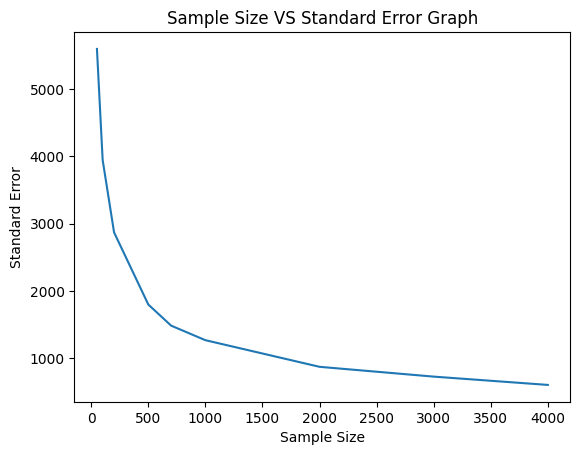

In [3]:
# Import libraries
import matplotlib.pyplot as plt

# Save the data to arrays in order to plot them in line graph:
sample_sizes = [50, 100, 200, 500, 700, 1000, 2000, 3000, 4000]
std_errors = [sample_50_std_error, sample_100_std_error, sample_200_std_error, sample_500_std_error, sample_700_std_error, sample_1000_std_error, sample_2000_std_error, sample_3000_std_error, sample_4000_std_error]

# Plot line graph
plt.plot(sample_sizes, std_errors)
plt.ylabel("Standard Error")
plt.xlabel("Sample Size")
plt.title("Sample Size VS Standard Error Graph")
plt.show()

**Observation:** It appears that around the 500 samples size the curve begins to flatten out. After the 1000 sample size mark, the curve is no longer steep. I would choose suggest the sample size of **500** to be the most optimal.

**Q8.** Using the same dataset:

* a) Take one sample of 100 incomes.
* b) Use bootstrapping (1,000 resamples) to compute a **95% confidence interval for the mean**.
* c) Print and interpret the result.

---

In [7]:
# create empty list to store mean
mean_storage = list()

# create loop for bootstrap sampling:
for i in range(1000):
    sample = np.random.choice(population_income, size=100, replace=True) # carry out sampling with replacement
    sample_mean = np.mean(sample) # find the mean of the samples
    mean_storage.append(sample_mean) # store the mean in the array
    
# 95% Confidence Interval (percentile method)
lower = np.percentile(mean_storage, 2.5)
upper = np.percentile(mean_storage, 97.5)


print(f"95% Confidence Interval for the mean: ({lower:.2f}, {upper:.2f})")

95% Confidence Interval for the mean: (32435.76, 47899.78)


Let's plot and visualize the 95% confidence interval for the bootstrapped mean:

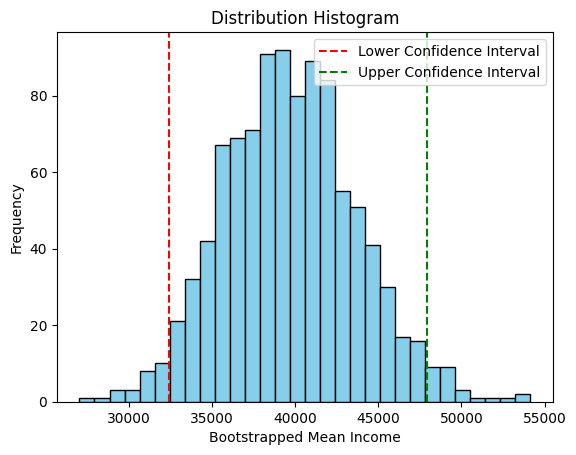

In [15]:
plt.hist(mean_storage, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Bootstrapped Mean Income")
plt.ylabel("Frequency")
plt.title("Distribution Histogram")
# Add vertical line at lower confidence interval
plt.axvline(x=lower, color='r', linestyle='--', label="Lower Confidence Interval")
# Add vertical line at upper confidence interval
plt.axvline(x=upper, color='g', linestyle='--', label="Upper Confidence Interval")
# Show legend
plt.legend()

plt.show()

**Observation:** It seems the 85% confidence interval falls within the majority of the bootstrapped mean's distribution.